# Create Intermediate Raster Result

In [1]:
from datetime import datetime

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
User Id:             9b390846-0f47-477a-9c07-be9c083c5935
Session Id:          311d80ba-965c-4d73-b280-7c072f2ce1de
Session valid until: 2025-12-27T13:54:38.129Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({"type": "Raster", "operator": {"type": "GdalSource", "params": {"data": "ndvi"}}})
workflow

1e415c9c-55f3-51a2-b50b-b5053d1debbb

## Query raster via WMS

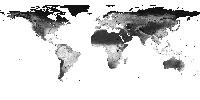

In [5]:
time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.wms_get_map_as_image(
    ge.QueryRectangle(ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0), ge.TimeInterval(time, time)),
    raster_colorizer=ge.SingleBandRasterColorizer(
        band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
    ),
    spatial_resolution=ge.SpatialResolution(1.8, 1.8),
)

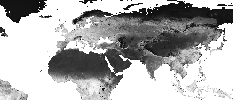

In [6]:
workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(
        band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
    ),
    spatial_resolution=ge.SpatialResolution(0.9, 0.9),
)

## Store part of the world as new dataset

In [7]:
task = workflow.save_as_dataset(
    ge.QueryRectangle(
        #ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0), FIXME: 
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(
            datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z"),
            datetime.strptime("2014-06-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z"),
        ),
    ),
    name=session.user_id + ":part_ndvi",
    display_name="Part NDVI",
    description="Test Description",
)
task

TimeInterval(start=2014-04-01T12:00:00.000000, end=2014-06-01T12:00:00.000000) 1396353600000 1401624000000


UUID('b0e23edf-a60c-4ab4-a518-1d2e750988cf')

In [8]:
task_status_info = task.wait_for_finish(1)
task_status_info

b0e23edf-a60c-4ab4-a518-1d2e750988cf
b0e23edf-a60c-4ab4-a518-1d2e750988cf
status=running, time_started=2025-11-27 13:54:38.564000+00:00, pct_complete=0.00%, estimated_time_remaining=? (± ?), info=None, task_type=create-dataset, description=Creating dataset Part NDVI from workflow 1e415c9c-55f3-51a2-b50b-b5053d1debbb
b0e23edf-a60c-4ab4-a518-1d2e750988cf
status=completed, time_started=2025-11-27 13:54:38.564000+00:00, info={'dataset': '9b390846-0f47-477a-9c07-be9c083c5935:part_ndvi', 'upload': '31e344e0-486c-4e80-be02-05e6a3f2c350'}, time_total=00:00:00, task_type=create-dataset, description=Creating dataset Part NDVI from workflow 1e415c9c-55f3-51a2-b50b-b5053d1debbb


TaskStatusInfo(status='completed', time_started=datetime.datetime(2025, 11, 27, 13, 54, 38, 564000, tzinfo=datetime.timezone.utc), info = {'dataset': '9b390846-0f47-477a-9c07-be9c083c5935:part_ndvi', 'upload': '31e344e0-486c-4e80-be02-05e6a3f2c350'}, time_total = '00:00:00', task_type='create-dataset', description='Creating dataset Part NDVI from workflow 1e415c9c-55f3-51a2-b50b-b5053d1debbb')

In [9]:
stored_dataset = ge.StoredDataset.from_response(task_status_info.info)
stored_dataset

StoredDataset(dataset_name=9b390846-0f47-477a-9c07-be9c083c5935:part_ndvi, upload_id=31e344e0-486c-4e80-be02-05e6a3f2c350)

In [10]:
new_workflow = ge.register_workflow(
    {"type": "Raster", "operator": {"type": "GdalSource", "params": {"data": str(stored_dataset.dataset_name)}}}
)
new_workflow

ca671ed1-b859-5e0a-b8c2-b6229a4361d1

## WMS request from new dataset

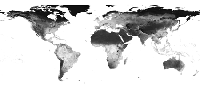

In [11]:
time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(
        band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
    ),
    spatial_resolution=ge.SpatialResolution(1.8, 1.8),
)

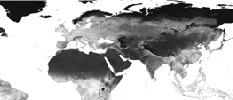

In [12]:
time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(
        band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
    ),
    spatial_resolution=ge.SpatialResolution(0.9, 0.9),
)

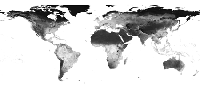

In [13]:
time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(
        band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
    ),
    spatial_resolution=ge.SpatialResolution(1.8, 1.8),
)

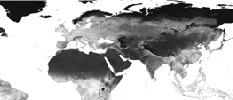

In [14]:
time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0), ge.TimeInterval(time, time)),
    raster_colorizer=ge.SingleBandRasterColorizer(
        band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
    ),
    spatial_resolution=ge.SpatialResolution(0.9, 0.9),
)

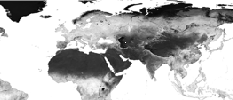

In [15]:
time = datetime.strptime("2014-05-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0), ge.TimeInterval(time, time)),
    raster_colorizer=ge.SingleBandRasterColorizer(
        band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
    ),
    spatial_resolution=ge.SpatialResolution(0.9, 0.9),
)